In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree

In [20]:
df=pd.read_csv(r"C:\Users\ultra_instinct\lets upgrade AI-ML\optimization techniques\Materials\User_Data - Arindam Dev.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [21]:
x= df.iloc[:,2:4].values
y=df.iloc[:,4:5].values

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [23]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)

### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [25]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[70,  9],
       [ 4, 37]], dtype=int64)

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        79
           1       0.80      0.90      0.85        41

    accuracy                           0.89       120
   macro avg       0.88      0.89      0.88       120
weighted avg       0.90      0.89      0.89       120



[Text(163.215, 209.07692307692307, 'X[0] <= 0.553\nentropy = 0.946\nsamples = 280\nvalue = [178, 102]'),
 Text(86.09142857142857, 192.35076923076923, 'X[1] <= 0.598\nentropy = 0.676\nsamples = 202\nvalue = [166, 36]'),
 Text(47.82857142857143, 175.62461538461537, 'X[0] <= -0.134\nentropy = 0.224\nsamples = 166\nvalue = [160, 6]'),
 Text(38.26285714285714, 158.89846153846153, 'entropy = 0.0\nsamples = 109\nvalue = [109, 0]'),
 Text(57.394285714285715, 158.89846153846153, 'X[1] <= 0.396\nentropy = 0.485\nsamples = 57\nvalue = [51, 6]'),
 Text(47.82857142857143, 142.1723076923077, 'X[1] <= -0.067\nentropy = 0.376\nsamples = 55\nvalue = [51, 4]'),
 Text(38.26285714285714, 125.44615384615385, 'entropy = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(57.394285714285715, 125.44615384615385, 'X[1] <= 0.02\nentropy = 0.592\nsamples = 28\nvalue = [24, 4]'),
 Text(47.82857142857143, 108.72, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(66.96000000000001, 108.72, 'X[0] <= 0.258\nentropy = 0.50

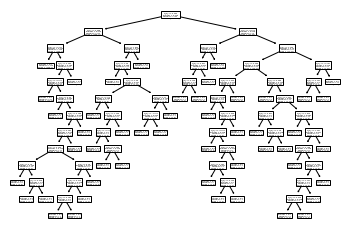

In [31]:
tree.plot_tree(classifier)

In [33]:
text_representation=tree.export_text(classifier)
print(text_representation)

|--- feature_0 <= 0.55
|   |--- feature_1 <= 0.60
|   |   |--- feature_0 <= -0.13
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -0.13
|   |   |   |--- feature_1 <= 0.40
|   |   |   |   |--- feature_1 <= -0.07
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  -0.07
|   |   |   |   |   |--- feature_1 <= 0.02
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  0.02
|   |   |   |   |   |   |--- feature_0 <= 0.26
|   |   |   |   |   |   |   |--- feature_1 <= 0.25
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.14
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.16
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_0 >  0.16
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.05
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  0.05
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   

### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(x_train,y_train)

<ipython-input-34-4a57590b7bc7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(n_estimators=50)

In [36]:
y_pred=rfc.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [37]:
CM=confusion_matrix(y_test,y_pred)
CM

array([[73,  6],
       [ 4, 37]], dtype=int64)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



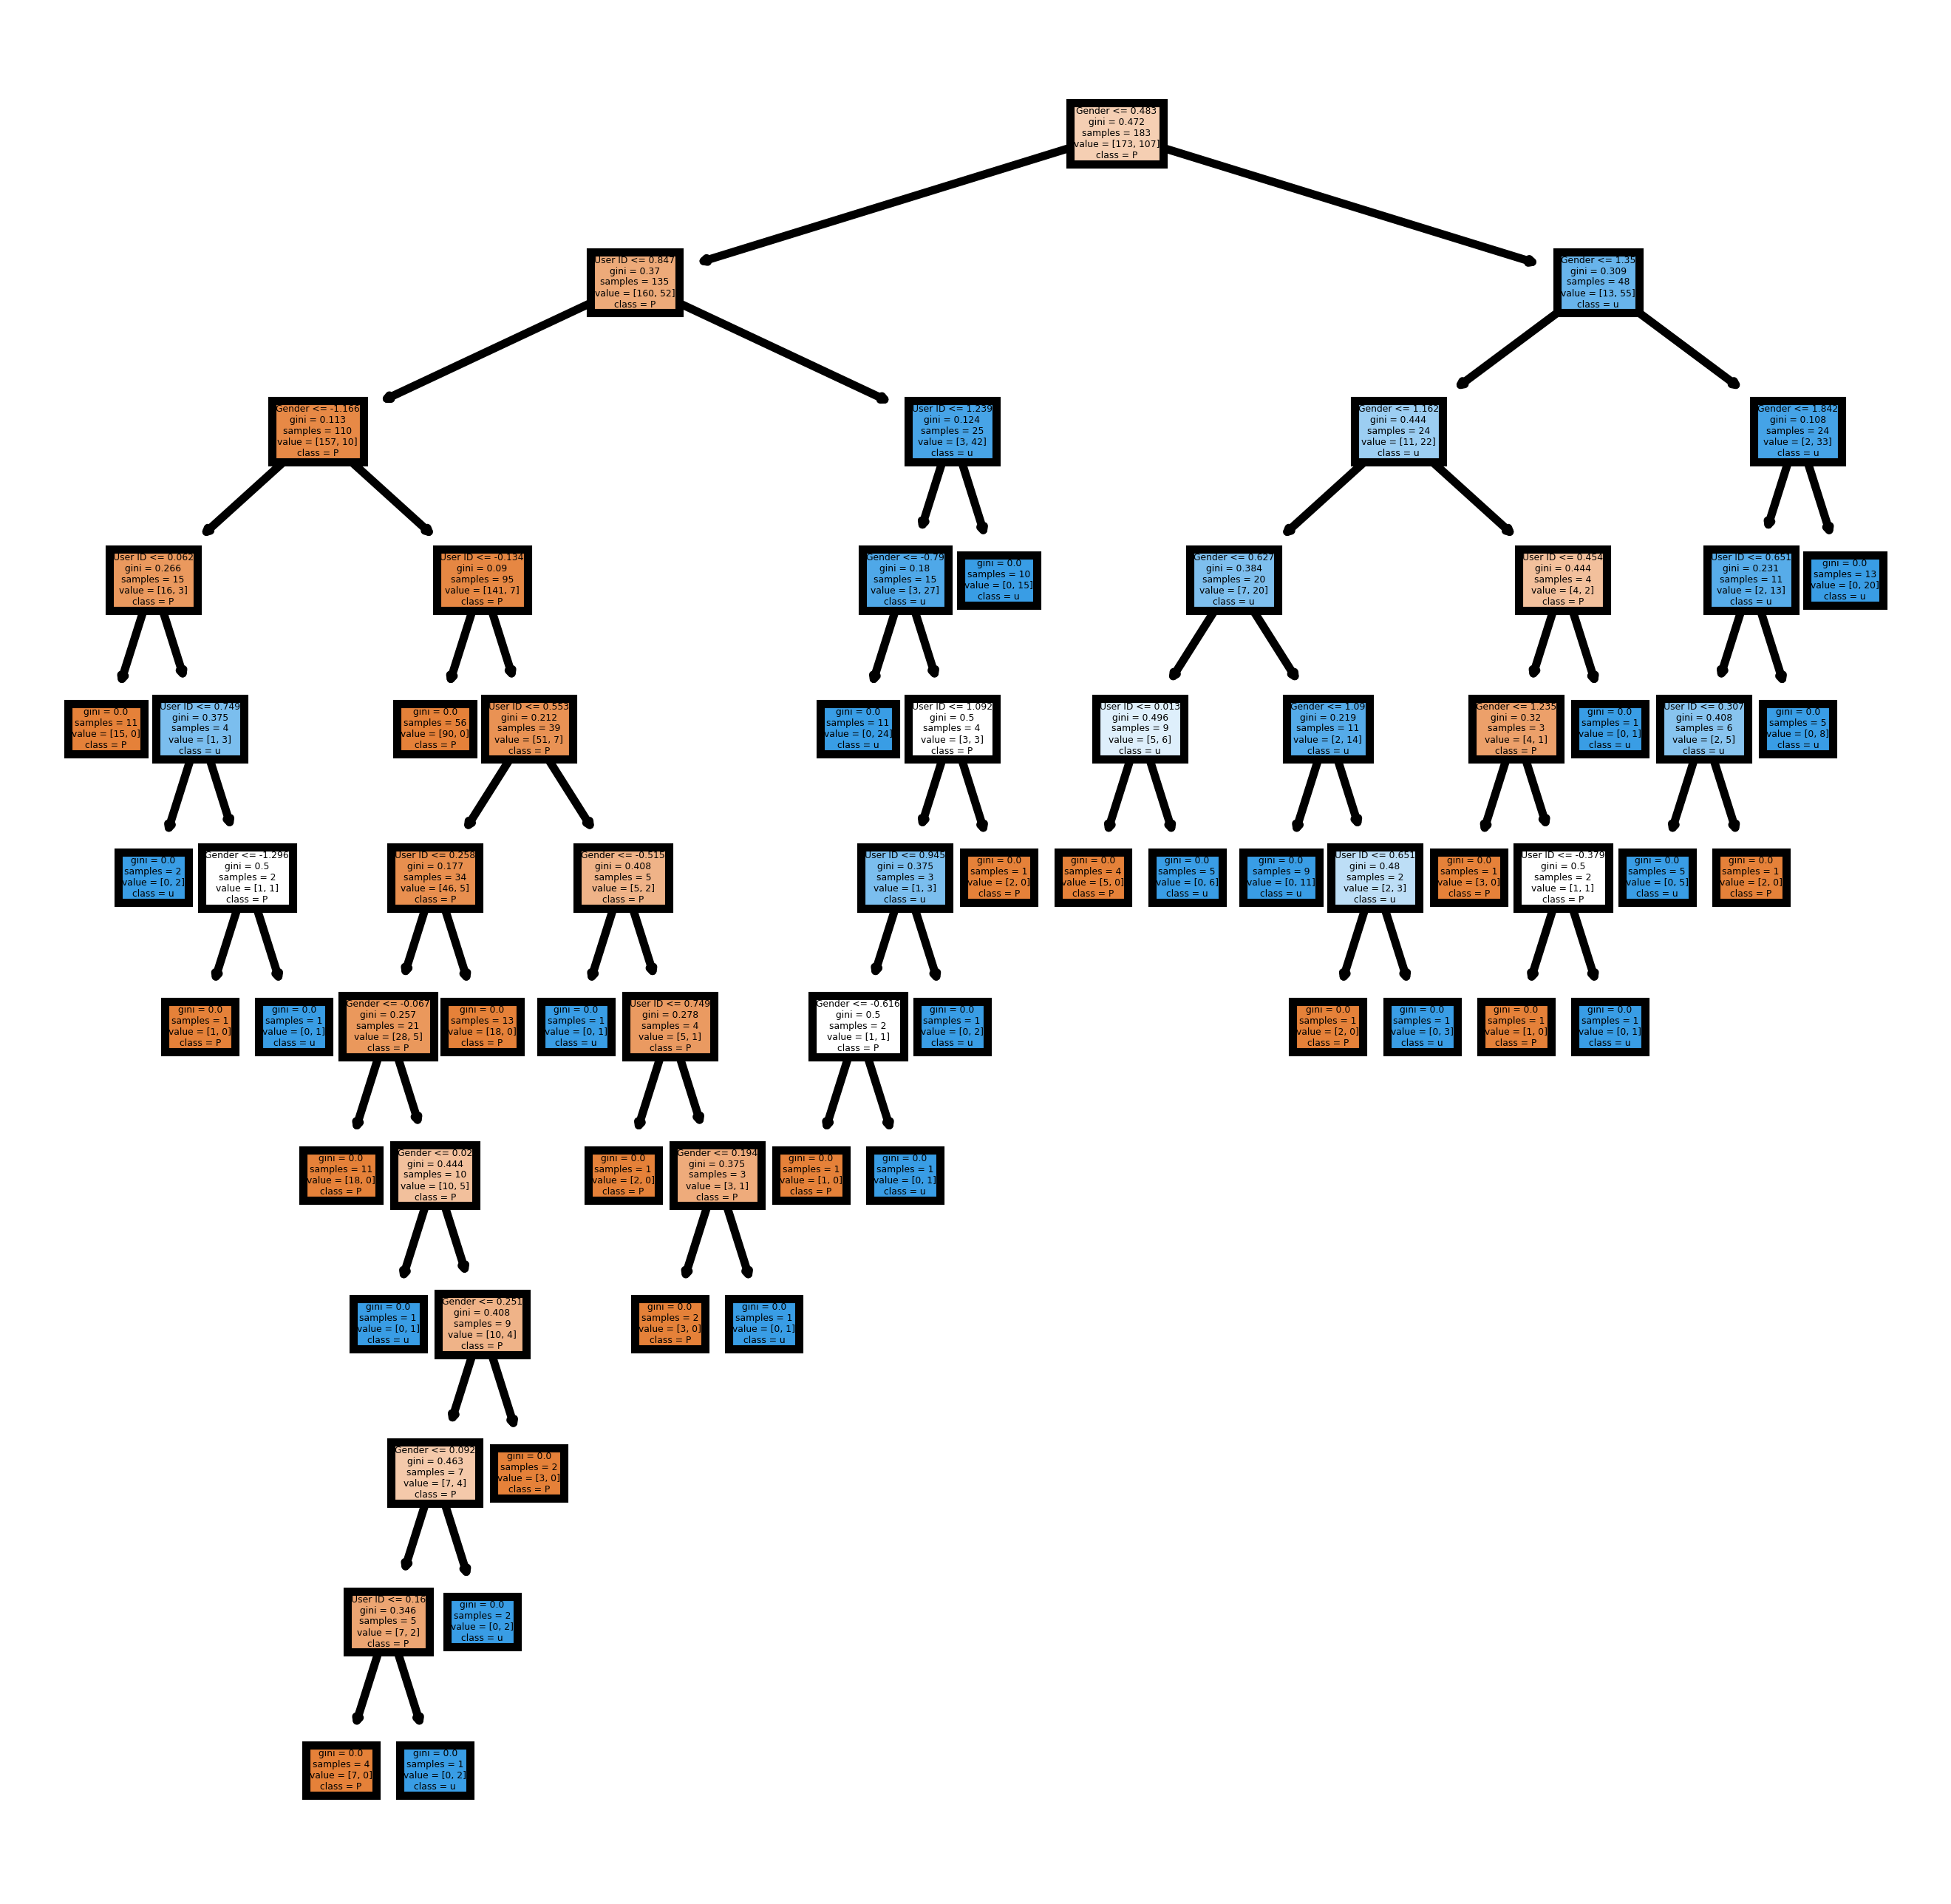

In [50]:
fn=df.columns[:4]
cn=df.columns[-1]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfc.estimators_[0],
               feature_names=fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')